# **Semana 9: Gráficos Básicos de Fútbol**

## Bloque 2: Explorando Datos Deportivos con Python

---

**Lo que aprenderemos hoy:**
- Crear gráficos de barras para comparar equipos
- Hacer histogramas para ver distribuciones de goles
- Usar boxplots para análisis estadístico visual
- Personalizar colores y títulos en seaborn

**¿Por qué es interesante?**
¡Una imagen vale más que mil números! Aprenderemos a convertir datos en gráficos que cuenten historias del fútbol.

---

## 1. ¿Por qué Hacer Gráficos?

### 1.1 Los Gráficos son Mejores que las Tablas

**Es más fácil ver patrones en gráficos que en números**

Imagina que tienes estos datos:
- Equipo A: 25 goles
- Equipo B: 18 goles  
- Equipo C: 30 goles

¿Qué es más fácil de entender?

**Una tabla con números** (aburrida)
```
Equipo | Goles
A      | 25
B      | 18  
C      | 30
```

**Un gráfico** (¡se ve inmediatamente que C es el mejor!)

### 1.2 ¿Para qué Sirven los Gráficos en Fútbol?

- **Ver quién es mejor**: ¿Qué equipo anota más?
- **Encontrar patrones**: ¿Los equipos locales ganan más?
- **Tomar decisiones**: ¿En qué jugador invertir?
- **Comparar fácilmente**: Varios equipos a la vez

### 1.3 Tipos de Gráficos Simples

#### **Gráfico de Barras**
- Para comparar categorías
- Ejemplo: Goles por equipo

#### **Gráfico de Líneas**  
- Para ver cambios en el tiempo
- Ejemplo: Goles por mes

#### **Gráfico de Puntos**
- Para ver relaciones
- Ejemplo: ¿Más tiros = más goles?

## 2. Configuración Simple

### 2.1 Librerías que Necesitamos

Vamos a usar principalmente **seaborn** porque hace gráficos bonitos automáticamente:

- **Pandas**: Para manejar datos
- **Seaborn**: Para gráficos bonitos
- **Matplotlib**: Para mostrar los gráficos
- **NumPy**: Para crear datos de ejemplo

### ¿Por qué Seaborn?
- Gráficos bonitos sin esfuerzo
- Perfecto para análisis de deportes
- Menos código = más tiempo para analizar

In [1]:
# Importar librerías para gráficos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Configuración simple con seaborn
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (10, 6)

print("Librerías listas para gráficos")
print("Pandas: Para datos")
print("Seaborn: Para gráficos bonitos")
print("Matplotlib: Para mostrar gráficos")
print("\n¡Todo listo para hacer gráficos de fútbol!")

Librerías listas para gráficos
Pandas: Para datos
Seaborn: Para gráficos bonitos
Matplotlib: Para mostrar gráficos

¡Todo listo para hacer gráficos de fútbol!


## 3. Datos de Partidos de Fútbol

### 3.1 Crear Datos Simples de Partidos

Vamos a crear datos simples de partidos de fútbol para practicar gráficos:

- **Equipos**: Local vs. Visitante
- **Goles**: Cuántos goles anotó cada equipo
- **Resultado**: Quién ganó
- **Otras cosas**: Posesión, tiros, faltas

Los datos serán inventados pero realistas, como si fueran de una liga real.

In [2]:
# Crear datos simples de partidos de fútbol
np.random.seed(42)  # Para que todos tengamos los mismos datos

# Equipos de ejemplo
equipos = ['Real Madrid', 'Barcelona', 'Atlético', 'Sevilla', 'Valencia', 'Betis']

# Crear 50 partidos simples
partidos_data = []

for i in range(50):
    # Elegir equipos para el partido
    equipo_local = np.random.choice(equipos)
    equipo_visitante = np.random.choice([e for e in equipos if e != equipo_local])
    
    # Goles (los locales tienen pequeña ventaja)
    goles_local = np.random.randint(0, 4)
    goles_visitante = np.random.randint(0, 3)
    
    # Quien ganó
    if goles_local > goles_visitante:
        resultado = 'Local'
    elif goles_visitante > goles_local:
        resultado = 'Visitante'
    else:
        resultado = 'Empate'
    
    # Datos adicionales simples
    posesion_local = np.random.randint(30, 70)
    tiros_local = np.random.randint(3, 15)
    tiros_visitante = np.random.randint(3, 15)
    
    partidos_data.append({
        'Local': equipo_local,
        'Visitante': equipo_visitante,
        'Goles_Local': goles_local,
        'Goles_Visitante': goles_visitante,
        'Resultado': resultado,
        'Posesion_Local': posesion_local,
        'Tiros_Local': tiros_local,
        'Tiros_Visitante': tiros_visitante,
        'Total_Goles': goles_local + goles_visitante
    })

# Crear tabla de datos
df_partidos = pd.DataFrame(partidos_data)

# Ver nuestros datos
print("DATOS DE PARTIDOS CREADOS")
print("=" * 30)
print(f"Total de partidos: {len(df_partidos)}")
print(f"Equipos: {len(equipos)}")

print(f"\nPrimeros 5 partidos:")
print(df_partidos.head())

print(f"\n¿Quién gana más?")
print(df_partidos['Resultado'].value_counts())

DATOS DE PARTIDOS CREADOS
Total de partidos: 50
Equipos: 6

Primeros 5 partidos:
       Local  Visitante  Goles_Local  Goles_Visitante Resultado  \
0    Sevilla      Betis            2                2    Empate   
1  Barcelona    Sevilla            2                2    Empate   
2    Sevilla   Atlético            1                0     Local   
3      Betis  Barcelona            3                0     Local   
4      Betis   Valencia            3                0     Local   

 Posesion_Local  Tiros_Local  Tiros_Visitante  Total_Goles  
0              37            7                9            4  
1              40           10                7            4  
2              31           10               14            1  
3              62           14               12            3  
4              56           13               12            3  

¿Quién gana más?
Resultado
Local        33
Empate       13
Visitante     4
Name: count, dtype: int64


## 4. Nuestros Primeros Gráficos

### 4.1 ¿Los Equipos Locales Ganan Más?

Una pregunta interesante: **¿Es mejor jugar en casa?**

Vamos a hacer gráficos para descubrirlo.

ANÁLISIS: ¿GANAN MÁS LOS LOCALES?


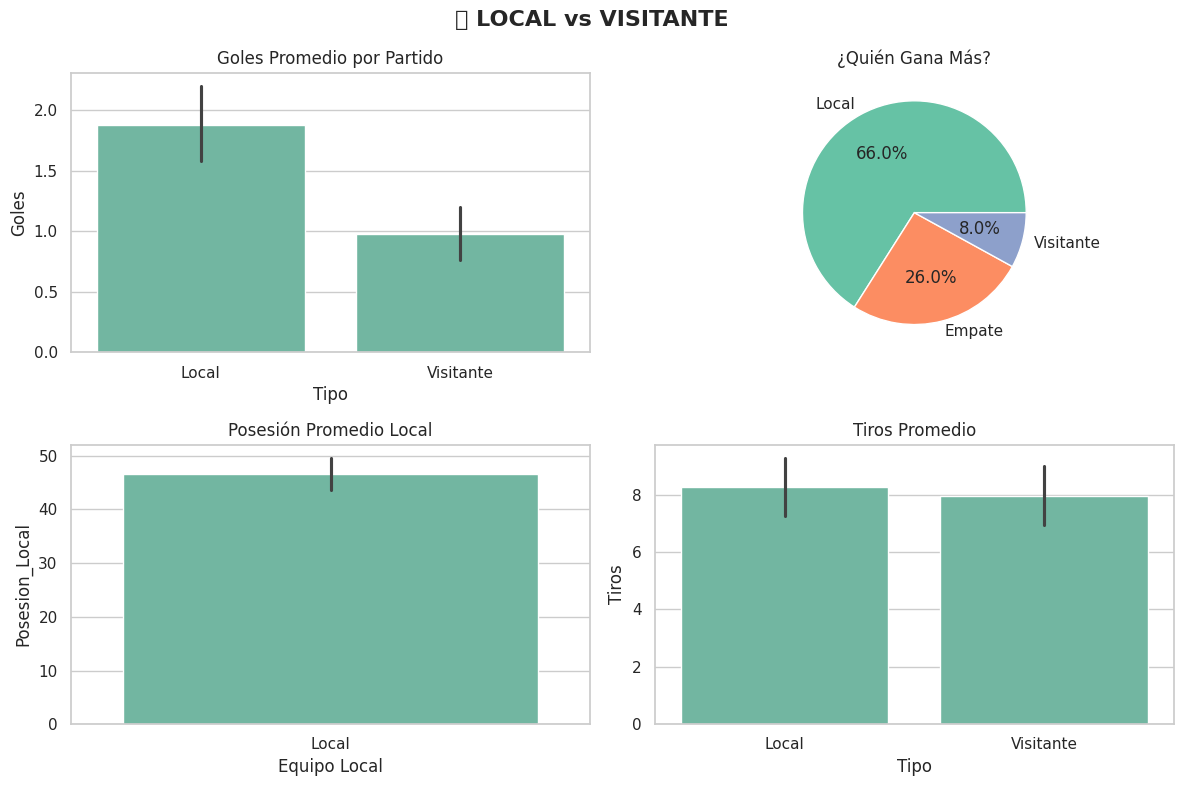


RESUMEN DE NÚMEROS:
Goles promedio local: 1.9
Goles promedio visitante: 1.0

¡SÍ! Los equipos locales anotan más goles


In [ ]:
# Hacer gráficos simples para comparar Local vs Visitante
print("ANÁLISIS: ¿GANAN MÁS LOS LOCALES?")
print("=" * 40)

# Preparar datos para comparar
datos_comparacion = []
for _, row in df_partidos.iterrows():
    datos_comparacion.append({'Tipo': 'Local', 'Goles': row['Goles_Local']})
    datos_comparacion.append({'Tipo': 'Visitante', 'Goles': row['Goles_Visitante']})

df_comparacion = pd.DataFrame(datos_comparacion)

# Crear gráficos con seaborn (súper fácil!)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('LOCAL vs VISITANTE', fontsize=16, fontweight='bold')

# Gráfico 1: Goles promedio
sns.barplot(data=df_comparacion, x='Tipo', y='Goles', ax=axes[0, 0])
axes[0, 0].set_title('Goles Promedio por Partido')

# Gráfico 2: ¿Quién gana más?
resultados = df_partidos['Resultado'].value_counts()
axes[0, 1].pie(resultados.values, labels=resultados.index, autopct='%1.1f%%')
axes[0, 1].set_title('¿Quién Gana Más?')

# Gráfico 3: Posesión
sns.barplot(data=df_partidos, x=['Local']*len(df_partidos), y='Posesion_Local', ax=axes[1, 0])
axes[1, 0].set_title('Posesión Promedio Local')
axes[1, 0].set_xlabel('Equipo Local')

# Gráfico 4: Tiros
datos_tiros = []
for _, row in df_partidos.iterrows():
    datos_tiros.append({'Tipo': 'Local', 'Tiros': row['Tiros_Local']})
    datos_tiros.append({'Tipo': 'Visitante', 'Tiros': row['Tiros_Visitante']})

df_tiros = pd.DataFrame(datos_tiros)
sns.barplot(data=df_tiros, x='Tipo', y='Tiros', ax=axes[1, 1])
axes[1, 1].set_title('Tiros Promedio')

plt.tight_layout()
plt.show()

# Mostrar números simples
print("\nRESUMEN DE NÚMEROS:")
goles_local_promedio = df_partidos['Goles_Local'].mean()
goles_visitante_promedio = df_partidos['Goles_Visitante'].mean()

print(f"Goles promedio local: {goles_local_promedio:.1f}")
print(f"Goles promedio visitante: {goles_visitante_promedio:.1f}")

if goles_local_promedio > goles_visitante_promedio:
    print("\n¡SÍ! Los equipos locales anotan más goles")
else:
    print("\nNo hay mucha diferencia")

## 5. Más Gráficos Bonitos

### 5.1 Otros Tipos de Gráficos Útiles

Seaborn tiene muchos tipos de gráficos. Vamos a probar algunos más.

MÁS GRÁFICOS BONITOS


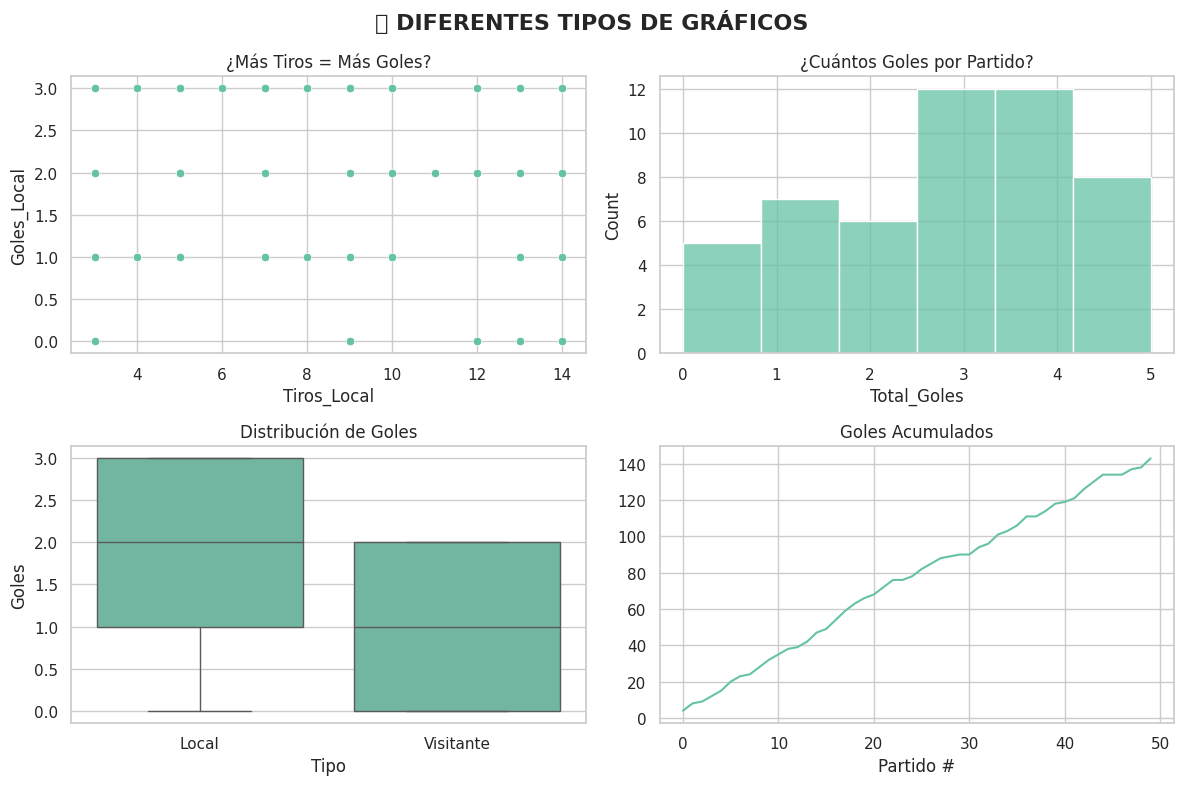


¿QUÉ VEMOS EN LOS GRÁFICOS?
El gráfico de puntos muestra si más tiros = más goles
El histograma muestra cuántos goles son normales por partido
El boxplot compara las distribuciones
La línea muestra cómo se acumulan los goles

¡Con seaborn hacer gráficos es súper fácil!


In [ ]:
# Más tipos de gráficos con seaborn
print("MÁS GRÁFICOS BONITOS")
print("=" * 25)

# Crear diferentes tipos de gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('DIFERENTES TIPOS DE GRÁFICOS', fontsize=16, fontweight='bold')

# 1. Gráfico de puntos (scatter)
sns.scatterplot(data=df_partidos, x='Tiros_Local', y='Goles_Local', ax=axes[0, 0])
axes[0, 0].set_title('¿Más Tiros = Más Goles?')

# 2. Histograma (distribución)
sns.histplot(data=df_partidos, x='Total_Goles', bins=6, ax=axes[0, 1])
axes[0, 1].set_title('¿Cuántos Goles por Partido?')

# 3. Gráfico de caja (boxplot)
sns.boxplot(data=df_comparacion, x='Tipo', y='Goles', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Goles')

# 4. Gráfico de línea simple
goles_acumulados = df_partidos['Total_Goles'].cumsum()
axes[1, 1].plot(range(len(goles_acumulados)), goles_acumulados)
axes[1, 1].set_title('Goles Acumulados')
axes[1, 1].set_xlabel('Partido #')

plt.tight_layout()
plt.show()

print("\n¿QUÉ VEMOS EN LOS GRÁFICOS?")
print(f"El gráfico de puntos muestra si más tiros = más goles")
print(f"El histograma muestra cuántos goles son normales por partido")
print(f"El boxplot compara las distribuciones")
print(f"La línea muestra cómo se acumulan los goles")

print(f"\n¡Con seaborn hacer gráficos es súper fácil!")

## 6. Un Partido Emocionante

### 6.1 Simular un Partido con Remontada

Vamos a simular cómo se vería un partido muy emocionante en gráficos. ¡Como cuando un equipo está perdiendo 0-3 y termina ganando 4-3!

¡PARTIDO EMOCIONANTE!


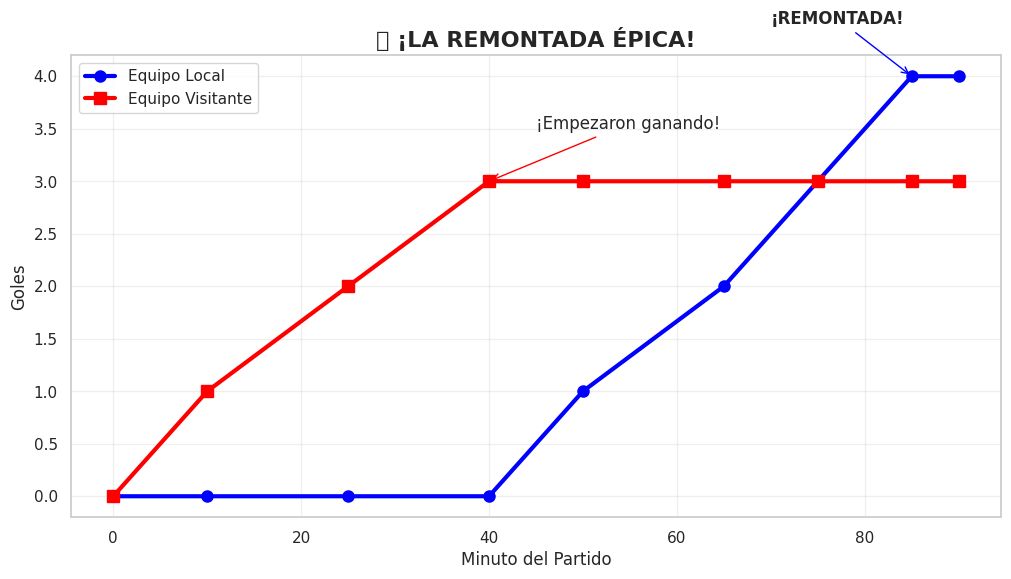


LA HISTORIA DEL PARTIDO:
Minuto 10: ¡Gol del visitante! 0-1
Minuto 25: ¡Segundo gol visitante! 0-2
Minuto 40: ¡Tercer gol visitante! 0-3
Minuto 50: ¡Primer gol local! 1-3
Minuto 65: ¡Segundo gol local! 2-3
Minuto 75: ¡Empate! 3-3
Minuto 85: ¡GOL DE LA VICTORIA! 4-3

¡Remontada histórica! De 0-3 a 4-3


In [ ]:
# Simular un partido emocionante (¡Una remontada!)
print("¡PARTIDO EMOCIONANTE!")
print("=" * 25)

# Crear la historia del partido
minutos = [0, 10, 25, 40, 50, 65, 75, 85, 90]
goles_local = [0, 0, 0, 0, 1, 2, 3, 4, 4]  # ¡Remontada épica!
goles_visitante = [0, 1, 2, 3, 3, 3, 3, 3, 3]  # Empezaron ganando

# Crear gráfico simple pero emocionante
plt.figure(figsize=(12, 6))
plt.plot(minutos, goles_local, marker='o', linewidth=3, markersize=8, 
         label='Equipo Local', color='blue')
plt.plot(minutos, goles_visitante, marker='s', linewidth=3, markersize=8,
         label='Equipo Visitante', color='red')

plt.title('¡LA REMONTADA ÉPICA!', size=16, fontweight='bold')
plt.xlabel('Minuto del Partido')
plt.ylabel('Goles')
plt.legend()
plt.grid(True, alpha=0.3)

# Agregar anotaciones emocionantes
plt.annotate('¡Empezaron ganando!', xy=(40, 3), xytext=(45, 3.5),
            arrowprops=dict(arrowstyle='->', color='red'))
plt.annotate('¡REMONTADA!', xy=(85, 4), xytext=(70, 4.5),
            arrowprops=dict(arrowstyle='->', color='blue'),
            fontsize=12, fontweight='bold')

plt.show()

# Contar la historia
print("\nLA HISTORIA DEL PARTIDO:")
print("Minuto 10: ¡Gol del visitante! 0-1")
print("Minuto 25: ¡Segundo gol visitante! 0-2") 
print("Minuto 40: ¡Tercer gol visitante! 0-3")
print("Minuto 50: ¡Primer gol local! 1-3")
print("Minuto 65: ¡Segundo gol local! 2-3")
print("Minuto 75: ¡Empate! 3-3")
print("Minuto 85: ¡GOL DE LA VICTORIA! 4-3")

print("\n¡Remontada histórica! De 0-3 a 4-3")

## 7. Resumen de lo que Aprendimos

### 7.1 ¿Qué Aprendimos Hoy?

**Los gráficos son mejores que las tablas** - Se ven los patrones más fácil  
**Seaborn hace gráficos bonitos** - Con muy poco código  
**Diferentes tipos de gráficos** - Barras, líneas, puntos, histogramas  
**Analizar datos deportivos** - Comparar locales vs visitantes  
**Contar historias con gráficos** - Como la remontada épica  

### 7.2 Tipos de Gráficos que Usamos

**sns.barplot()** - Para comparar categorías  
**plt.plot()** - Para líneas de tiempo  
**sns.scatterplot()** - Para ver relaciones  
**sns.histplot()** - Para ver distribuciones  
**sns.boxplot()** - Para comparar grupos  

### 7.3 ¡Lo Más Importante!

**Seaborn hace todo más fácil** - Un comando, un gráfico bonito  
**Los gráficos cuentan historias** - Mejor que solo números  
**El fútbol es perfecto para aprender** - Datos interesantes y fáciles de entender

PLANTILLA PARA PRACTICAR
FÓRMULA MÁGICA PARA GRÁFICOS:

1 Importar seaborn: import seaborn as sns
2 Configurar tema: sns.set_theme()
3 Hacer gráfico: sns.barplot(data=df, x='columna1', y='columna2')
4 Mostrar: plt.show()

¡Solo 4 pasos para gráficos profesionales!

EJEMPLOS SÚPER FÁCILES:

# Gráfico de barras
sns.barplot(data=df_partidos, x='Resultado', y='Total_Goles')

# Gráfico de puntos  
sns.scatterplot(data=df_partidos, x='Tiros_Local', y='Goles_Local')

# Histograma
sns.histplot(data=df_partidos, x='Total_Goles')

# Gráfico de caja
sns.boxplot(data=df_comparacion, x='Tipo', y='Goles')

CONSEJOS PRO:
Usa colores: palette='Set2'
Cambia tamaño: figsize=(10, 6)
Agrega títulos: plt.title('Mi Gráfico')
Usa seaborn para todo: ¡Es más fácil!


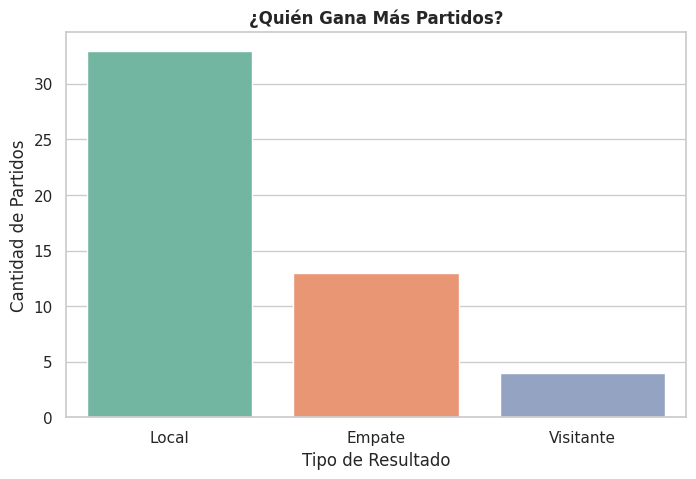


¡Ahora ya sabes hacer gráficos profesionales con seaborn!


In [ ]:
# Plantilla simple para hacer tus propios gráficos
print("PLANTILLA PARA PRACTICAR")
print("=" * 30)

print("FÓRMULA MÁGICA PARA GRÁFICOS:")
print("""
1. Importar seaborn: import seaborn as sns
2. Configurar tema: sns.set_theme()
3. Hacer gráfico: sns.barplot(data=df, x='columna1', y='columna2')
4. Mostrar: plt.show()

¡Solo 4 pasos para gráficos profesionales!
""")

print("EJEMPLOS SÚPER FÁCILES:")
print("""
# Gráfico de barras
sns.barplot(data=df_partidos, x='Resultado', y='Total_Goles')

# Gráfico de puntos  
sns.scatterplot(data=df_partidos, x='Tiros_Local', y='Goles_Local')

# Histograma
sns.histplot(data=df_partidos, x='Total_Goles')

# Gráfico de caja
sns.boxplot(data=df_comparacion, x='Tipo', y='Goles')
""")

print("CONSEJOS PRO:")
print("Usa colores: palette='Set2'")
print("Cambia tamaño: figsize=(10, 6)")
print("Agrega títulos: plt.title('Mi Gráfico')")
print("Usa seaborn para todo: ¡Es más fácil!")

# Ejemplo rápido
plt.figure(figsize=(8, 5))
resultados_df = df_partidos['Resultado'].value_counts().reset_index()
sns.barplot(data=resultados_df, x='Resultado', y='count', palette='Set2')
plt.title('¿Quién Gana Más Partidos?', fontweight='bold')
plt.xlabel('Tipo de Resultado')
plt.ylabel('Cantidad de Partidos')
plt.show()

print("\n¡Ahora ya sabes hacer gráficos profesionales con seaborn!")

---

## ¡Felicitaciones!

### Lo que Lograste Hoy

**¡Aprendiste a hacer gráficos profesionales!**

**Entiendes por qué los gráficos son útiles**  
**Sabes usar seaborn para hacer gráficos bonitos**  
**Puedes comparar datos con gráficos de barras**  
**Sabes hacer gráficos de línea para mostrar tiempo**  
**Puedes usar gráficos de puntos para ver relaciones**  
**Entiendes cómo los gráficos cuentan historias**  

### Fórmula del Éxito con Seaborn

```python
# Solo necesitas recordar esto:
import seaborn as sns
sns.set_theme()

# ¡Y usar sns. para todo!
sns.barplot(...)    # Para comparar
sns.lineplot(...)   # Para tiempo  
sns.scatterplot(...) # Para relaciones
sns.histplot(...)   # Para distribuciones
```

### Secreto Pro

**Seaborn > Matplotlib** para principiantes porque:
- Hace gráficos bonitos automáticamente
- Menos código = menos problemas
- Perfecto para análisis de datos
- Fácil de aprender y usar

### Tu Siguiente Misión

¡Practica con tus propios datos! Puedes analizar:
- Tu equipo favorito
- Otros deportes
- Cualquier dato que te interese

### ¡Sigue Practicando!

Recuerda: **Los mejores analistas de datos empezaron como tú hoy**

**¡Ya tienes las herramientas para crear visualizaciones increíbles!**

---